Prerequisites: Import Libraries

In [4]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score


Step 1: Import CO2 levels dataset

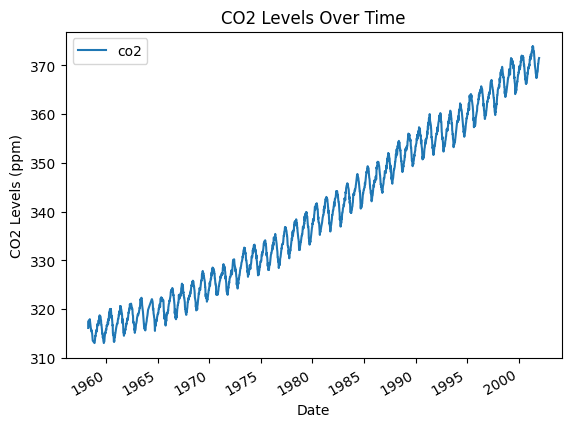

In [19]:
CO2 = sm.datasets.co2.load_pandas().data
CO2 = CO2.dropna()

#Graph the time series
ax = CO2.plot()
ax.set_title('CO2 Levels Over Time')
ax.set_xlabel('Date')
ax.set_ylabel('CO2 Levels (ppm)')
plt.show()

Step 2: Fit the variables month and year

In [20]:
# Extract 'year' and 'month' from the datetime index and create new columns
CO2['year'] = CO2.index.year
CO2['month'] = CO2.index.month

# Inspect the updated DataFrame
CO2.head()

,co2,year,month
1958-03-29,316.1,1958,3
1958-04-05,317.3,1958,4
1958-04-12,317.6,1958,4
1958-04-19,317.5,1958,4
1958-04-26,316.4,1958,4


3. Fit baseline Linear Regression with two new variables

In [25]:
#Step a: Create features and target sets
X = CO2[['year', 'month']]
y = CO2['co2']

#Step b: Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12345, shuffle = False)

#Step c: Fit a baseline model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [26]:
#Step d: Predict training
y_train_pred = model.predict(X_train)
y_train_pred[0:10]

array([312.54099019, 312.27448399, 312.27448399, 312.27448399,
       312.27448399, 312.00797778, 312.00797778, 312.00797778,
       311.47496538, 311.47496538])

In [27]:
#Step d: Predict test
y_test_pred = model.predict(X_test)
y_test_pred[0:10]

array([356.05313049, 355.78662429, 355.78662429, 355.78662429,
       355.78662429, 355.78662429, 355.52011808, 355.52011808,
       355.52011808, 355.52011808])

In [28]:
#Step e: Score results
train_score = r2_score(y_train, y_train_pred)
test_score = r2_score(y_test, y_test_pred)
print(train_score, test_score)

0.9690528910892225 0.3433251233951542


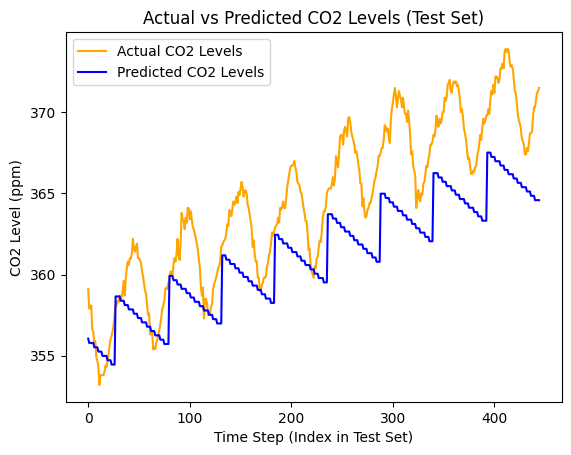

In [32]:
#Step f: Plot results
plt.plot(y_test.values, label='Actual CO2 Levels', color='orange')
plt.plot(y_test_pred, label='Predicted CO2 Levels', color='blue')
plt.title('Actual vs Predicted CO2 Levels (Test Set)')
plt.xlabel('Time Step (Index in Test Set)')
plt.ylabel('CO2 Level (ppm)')
plt.legend()
plt.show()

Step 4: Perform Time Delay Embedding

In [33]:
#Step a: Add lagged variables into the data
#Lags of 2 to 5 months give the model more context about medium-term patterns
CO2['co2_l1'] = CO2['co2'].shift(1)
CO2['co2_l2'] = CO2['co2'].shift(2)
CO2['co2_l3'] = CO2['co2'].shift(3)
CO2['co2_l4'] = CO2['co2'].shift(4)
CO2['co2_l5'] = CO2['co2'].shift(5)

Step 5: Drop missing values

In [34]:
CO2 = CO2.dropna()

Step 6: Fit the full linear regression model

In [35]:
#Step a: Create features and target sets
X = CO2[['year', 'month', 'co2_l1', 'co2_l2', 'co2_l3', 'co2_l4', 'co2_l5']]
y = CO2['co2']

#Step b: Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12345, shuffle=False)

#Step c: Fit model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [36]:
#Step d: Predict model
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [37]:
#Step e: Score Model
train_score = r2_score(y_train, y_train_pred)
test_score = r2_score(y_test, y_test_pred)
print(train_score, test_score)

0.998797756425323 0.9904370120462782


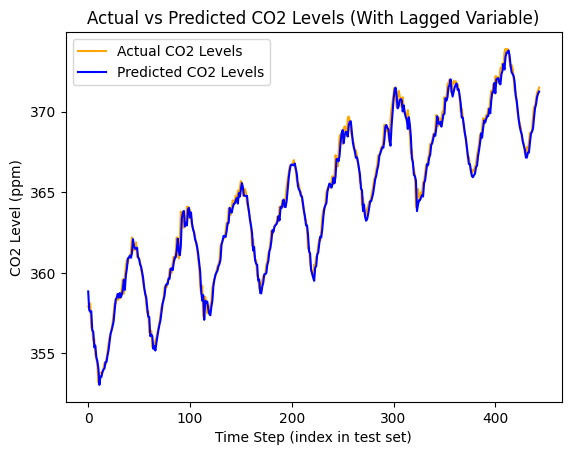

In [39]:
#Step f: Graph model
plt.plot(list(y_test), label='Actual CO2 Levels', color='orange')
plt.plot(list(y_test_pred), label='Predicted CO2 Levels', color='blue')
plt.title('Actual vs Predicted CO2 Levels (With Lagged Variable)')
plt.xlabel('Time Step (index in test set)')
plt.ylabel('CO2 Level (ppm)')
plt.legend()
plt.show()